<a href="https://colab.research.google.com/github/vapaul10/DESC624PredictiveAnalytics/blob/Homework/paul_valeri_HW1_DESC624_EDA_and_DecisionTrees_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESC 624 - EDA and Decision Tree Notebook**

HW #1

This notebook will contain both R and nearly equivalent Python code.  Pick the code you prefer to work with and make adjustments to that code as you move through the notebook. 

1. Remember to execute code as you go along by hitting the play button. 
2. Do not run things out of order.  You need to run things in sequence
3. If you pick Python, do **NOT** execute R blocks, if you pick R, do **NOT**  execute the Python blocks
4. Exception to 3., run everything in Section 1 for both R and Python (this way you have the environments properly set up for both)
5. Please make a copy of this notebook to **YOUR** Google Drive. 
  File -> Save a Copy in Drive
6. You will submit the actual notebook, so I can run it and you will submit a PDF version (File -> Print) of the complete notebook in which you have executed each coding block.
7. Please name your notebook and PDF version in the following way:

  HW1_lastname_firstname.ipynb for the notebook

  HW1_lastname_firstname.pdf for the PDF 





You must use %%R at the top of each notebook block in order for the code to be interpreted as R code. 

"#" before or after code is a comment

If you do not specify %%R at the top of the notebook block, the notebook will interpret the code as Python code.  

You are welcome to use whatever your prefer or both Python and R to do the work.  If you pick one or the other, before you finalize and submit your workbook, please delete the blocks of code you did not use (i.e., If you pick Python, delete all of the R code blocks)

You MUST use 
"#!pip install rpy2"
"%load_ext rpy2.ipython"

Before any R code is executed. Notice how this block of code does NOT contain a %%R at the top. 

In [425]:
#!pip3 install rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [426]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


#**I. R Setup Sections** 

In [427]:
%%R
#I. Setup ---------------------------------------------------

#Load Packages

a <- installed.packages()
pkgs <- rownames(a)


#Packages used in today's examples:
if("tidyverse" %in% pkgs == FALSE){
  install.packages("tidyverse")
}
if("stringr" %in% pkgs == FALSE){
  install.packages("stringr")
}
if("ggplot2" %in% pkgs == FALSE){
  install.packages("ggplot2")
}
if("ggExtra" %in% pkgs == FALSE){
  install.packages("ggExtra")
}
if("directlabels" %in% pkgs == FALSE){
  install.packages("directlabels")
}
if("data.table" %in% pkgs == FALSE){
  install.packages("data.table")
}
if("ROCR" %in% pkgs == FALSE){
  install.packages("ROCR")
}
if("GGally" %in% pkgs == FALSE) {
  install.packages("GGally")
}
if("gridExtra" %in% pkgs == FALSE) {
  install.packages("gridExtra")
}
if("grid" %in% pkgs == FALSE) {
  install.packages("grid")
}
if("rpart.plot" %in% pkgs == FALSE) {
  install.packages("rpart.plot")
}
if("rpart" %in% pkgs==FALSE) {
  install.packages("rpart")  
}

require(dplyr)
require(tidyverse)
require(stringr)
require(ggplot2)
require(ggExtra)
require(directlabels)
require(data.table)
require(ROCR)
require(gridExtra)
require(grid)
require(rpart)
require(rpart.plot)
require(GGally)



In [428]:
%%R

#H2o is the Machine Learning package we will be using. It has both an R implementation and a Python implemenation. 
#The h2o.init() is commented out below because we are not going to use it for this HW. 

install.packages("h2o")
require(h2o)

#h2o.init()
#h2o.shutdown()

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/h2o_3.32.1.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 562882 bytes (549 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

#**I. Python Setup Section**

In [429]:
##Python Packages
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sn
import numpy as np
from scipy import stats

In [430]:
#Install python datatable which is the same as data.table() in R
!pip install datatable
import datatable as dt

from datatable import (dt, f, by, ifelse, update, sort,
                       count, min, max, mean, sum, rowsum)

In [431]:
#Python h2o

#h2o is the Machine Learning package we will be using. It has both an R implementation and a Python implemenation. 
#The h2o.init() is commented out below because we are not going to use it for this HW.  You can only have on instance (either Python or R)
#of h2o running in any one session. 

! pip install h2o

import h2o

#h2o.init()
#h2o.shutdown()

#**II. R Data Loading**

You can use the lines of code to read in the raw data directly from a zip file from the UCI Machine Learning Repository.

I am going to help you with this for other data files we will look at together. 


fread() is a general purpose processing tool that converts ASCII character text files into an R data object. 

I have put certain files in my github as raw .csv files.  

fread() can be used to process these directly. 

In [ ]:
%%R

#You will notice that the data is different than what we have been working on in class. 
#This data is from the same source, but has different features

bank <- fread("https://raw.githubusercontent.com/jjghockey/DESC624/main/bank-full.csv", stringsAsFactors=TRUE)
head(bank)

 [0%] Downloaded 1378 bytes...
 [0%] Downloaded 2756 bytes...
 [0%] Downloaded 4134 bytes...
 [1%] Downloaded 5512 bytes...
 [1%] Downloaded 6890 bytes...
 [1%] Downloaded 8268 bytes...
 [1%] Downloaded 9646 bytes...
 [2%] Downloaded 11024 bytes...
 [2%] Downloaded 12402 bytes...
 [2%] Downloaded 13780 bytes...
 [2%] Downloaded 15158 bytes...
 [3%] Downloaded 16536 bytes...
 [3%] Downloaded 17914 bytes...
 [3%] Downloaded 19292 bytes...
 [4%] Downloaded 20670 bytes...
 [4%] Downloaded 22048 bytes...
 [4%] Downloaded 23426 bytes...
 [4%] Downloaded 24804 bytes...
 [5%] Downloaded 26182 bytes...
 [5%] Downloaded 27560 bytes...
 [5%] Downloaded 28938 bytes...
 [5%] Downloaded 30316 bytes...
 [6%] Downloaded 31694 bytes...
 [6%] Downloaded 33072 bytes...
 [6%] Downloaded 34450 bytes...
 [6%] Downloaded 35828 bytes...
 [7%] Downloaded 37206 bytes...
 [7%] Downloaded 38584 bytes...
 [7%] Downloaded 39962 bytes...
 [8%] Downloaded 41340 bytes...
 [8%] Downloaded 42718 bytes...
 [8%] Downloade

   age          job marital education default balance housing loan contact day
1:  58   management married  tertiary      no    2143     yes   no unknown   5
2:  44   technician  single secondary      no      29     yes   no unknown   5
3:  33 entrepreneur married secondary      no       2     yes  yes unknown   5
4:  47  blue-collar married   unknown      no    1506     yes   no unknown   5
5:  33      unknown  single   unknown      no       1      no   no unknown   5
6:  35   management married  tertiary      no     231     yes   no unknown   5
   month duration campaign pdays previous poutcome  y
1:   may      261        1    -1        0  unknown no
2:   may      151        1    -1        0  unknown no
3:   may       76        1    -1        0  unknown no
4:   may       92        1    -1        0  unknown no
5:   may      198        1    -1        0  unknown no
6:   may      139        1    -1        0  unknown no


#**II. Python Data Loading**

In [432]:
#Data Load in Python
bank_p = dt.fread("https://raw.githubusercontent.com/jjghockey/DESC624/main/bank-full.csv")
bank_p.head()

   | age  job           marital   education  default  balance  housing  loan  contact  …  pdays  previous  poutcome  y 
-- + ---  ------------  --------  ---------  -------  -------  -------  ----  -------     -----  --------  --------  --
 0 |  58  management    married   tertiary   no          2143  yes      no    unknown  …     -1         0  unknown   no
 1 |  44  technician    single    secondary  no            29  yes      no    unknown  …     -1         0  unknown   no
 2 |  33  entrepreneur  married   secondary  no             2  yes      yes   unknown  …     -1         0  unknown   no
 3 |  47  blue-collar   married   unknown    no          1506  yes      no    unknown  …     -1         0  unknown   no
 4 |  33  unknown       single    unknown    no             1  no       no    unknown  …     -1         0  unknown   no
 5 |  35  management    married   tertiary   no           231  yes      no    unknown  …     -1         0  unknown   no
 6 |  28  management    single    tertia

,age,job,marital,education,default,balance,housing,loan,contact,day,…,campaign,pdays,previous,poutcome,y
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,…,1,−1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,…,1,−1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,…,1,−1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,…,1,−1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,…,1,−1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,…,1,−1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,…,1,−1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,…,1,−1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,…,1,−1,0,unknown,no


#**III. R Data Exploration** 

In [ ]:
%%R
#III. Data Exploration -----------------------------------------
#A. File Structure
str(bank)
#B. Basic Summary 
summary(bank)


#**III. Python Data Exploration**

Pythons function for summary() only uses numeric values, so you will have to build categorical tables on your own.

In [433]:
bank_p.names

('age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y')

Categorical tables using python

In [434]:
bank_p['count'] = 1  #Build a new variable in order to count rows in the data
bank_p[f.y=="yes",'y1']=1
bank_p[f.y=="no",'y1']=0

bank_p[:, sum(f.count), by('y', 'y1')]  #Recode y into a 0/1 dummy variable. this is for classification later.

   | y    y1  count
-- + ---  --  -----
 0 | no    0  39922
 1 | yes   1   5289

[2 rows x 3 columns]


,y,y1,count
,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,0,39922
1,yes,1,5289


In [435]:
bank_pd=bank_p.to_pandas()     #Use this to convert a datatable object into a pandas object. 
summary = bank_pd.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
count,45211.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
y1,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


In [436]:
bank_pd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,count,y1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,0


In [437]:
bank_p[:, sum(f.count), by('marital') ]  #Summary table of Marital Status

   | marital   count
-- + --------  -----
 0 | divorced   5207
 1 | married   27214
 2 | single    12790

[3 rows x 2 columns]


,marital,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,divorced,5207
1,married,27214
2,single,12790


In [438]:
bank_p[:, sum(f.count), by('job') ] #Summary table of education 

   | job            count
-- + -------------  -----
 0 | admin.          5171
 1 | blue-collar     9732
 2 | entrepreneur    1487
 3 | housemaid       1240
 4 | management      9458
 5 | retired         2264
 6 | self-employed   1579
 7 | services        4154
 8 | student          938
 9 | technician      7597
10 | unemployed      1303
11 | unknown          288

[12 rows x 2 columns]


,job,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938


In [439]:
bank_p[:, sum(f.count), by('education') ] #Summary table of education 

   | education  count
-- + ---------  -----
 0 | primary     6851
 1 | secondary  23202
 2 | tertiary   13301
 3 | unknown     1857

[4 rows x 2 columns]


,education,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,primary,6851
1,secondary,23202
2,tertiary,13301
3,unknown,1857


In [440]:
bank_p[:, sum(f.count), by('default') ] #Summary table of default

   | default  count
-- + -------  -----
 0 | no       44396
 1 | yes        815

[2 rows x 2 columns]


,default,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,44396
1,yes,815


In [441]:
bank_p[:, sum(f.count), by('housing') ] #Summary table of housing

   | housing  count
-- + -------  -----
 0 | no       20081
 1 | yes      25130

[2 rows x 2 columns]


,housing,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,20081
1,yes,25130


In [442]:
bank_p[:, sum(f.count), by('loan') ] #Summary table of loan

   | loan  count
-- + ----  -----
 0 | no    37967
 1 | yes    7244

[2 rows x 2 columns]


,loan,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,37967
1,yes,7244


In [443]:
bank_p[:, sum(f.count), by('contact') ] #Summary table of contact 

   | contact    count
-- + ---------  -----
 0 | cellular   29285
 1 | telephone   2906
 2 | unknown    13020

[3 rows x 2 columns]


,contact,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,cellular,29285
1,telephone,2906
2,unknown,13020


In [444]:
bank_p[:, sum(f.count), by('day') ] #Summary table of month

   | day  count
-- + ---  -----
 0 |   1    322
 1 |   2   1293
 2 |   3   1079
 3 |   4   1445
 4 |   5   1910
 5 |   6   1932
 6 |   7   1817
 7 |   8   1842
 8 |   9   1561
 9 |  10    524
10 |  11   1479
11 |  12   1603
12 |  13   1585
13 |  14   1848
14 |  15   1703
 … |   …      …
26 |  27   1121
27 |  28   1830
28 |  29   1745
29 |  30   1566
30 |  31    643

[31 rows x 2 columns]


,day,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,1,322
1,2,1293
2,3,1079
3,4,1445
4,5,1910
5,6,1932
6,7,1817
7,8,1842
8,9,1561


In [445]:
bank_p[:, sum(f.count), by('month') ] #Summary table of month

   | month  count
-- + -----  -----
 0 | apr     2932
 1 | aug     6247
 2 | dec      214
 3 | feb     2649
 4 | jan     1403
 5 | jul     6895
 6 | jun     5341
 7 | mar      477
 8 | may    13766
 9 | nov     3970
10 | oct      738
11 | sep      579

[12 rows x 2 columns]


,month,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,apr,2932
1,aug,6247
2,dec,214
3,feb,2649
4,jan,1403
5,jul,6895
6,jun,5341
7,mar,477
8,may,13766


In [446]:
bank_p[:, sum(f.count), by('poutcome') ] #Summary table of month

   | poutcome  count
-- + --------  -----
 0 | failure    4901
 1 | other      1840
 2 | success    1511
 3 | unknown   36959

[4 rows x 2 columns]


,poutcome,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,failure,4901
1,other,1840
2,success,1511
3,unknown,36959


I want you to describe two additional features you think are useful for the model and why you think they are useful. Bring in outside research if necessary.  You need to create the features in either R or Python.  These features should be included in your Decision Tree model and your plots of the data should include these features against the response.

**Feature 1**
####  ##  > The education category is important.  An analyst would likely have background knowledge to know that as an individual gains more and more education his or her income increases accordingly.  With more income an individual is more likely to need the services of a bank, like a saving account, loans and more. Like a new graduate of college, who has a steady income may be looking to save money and interested inexploring a bank and it services.  Google search reveals teritary, a term in the dataset, means university or college level of education. Secondary means prepared for vocational or tertiary education. Primary is elementary level education.  Unknown is a small amount of the dataset. 


**Feature 2**  
#### ## >  The age category can be important, because at different times in people lives they tend to have needs for various types of bank services.
 



#**IV. R Data Processing**

In [260]:
%%R
#IV. Data Processing --------------------------------------------
#A. Adjust values based on the review of the data

#B. Filter the data


#C. Build additional features



NULL


#**IV. Python Data Processing**

In [447]:
#IV. Data Processing --------------------------------------------
#A. Adjust values based on the review of the data
import numpy as np
bank_pd = bank_p.to_pandas()
bank_pd['pdays'] = bank_pd['pdays'].replace({999: np.NaN})

In [448]:
bank_pd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,count,y1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,0


In [449]:
bank_p=dt.Frame(bank_pd) 

In [ ]:
bank_p.head()

In [451]:
#B. Filter the data
bank_p=bank_p[f.duration>0,:]   ### post hoc 

In [452]:
del bank_p[:,'duration']  #Variable no good.  We do not know the duration of the call BEFORE the call occurs

In [ ]:
bank_p.head()

In [454]:
#C. Build additional features
from scipy import stats
bank_p['previous_norm'] = stats.zscore(bank_p['previous'])

In [455]:
from scipy import stats
bank_p[:,'campaign_norm'] = stats.zscore(bank_p['campaign'])

In [ ]:
#C. (cont) Build additional features
#Feature 2 - Age
bank_p[f.age<=17, 'Age_CAT'] = '<=17'
bank_p[(f.age>=18) & (f.age<=24), 'Age_CAT'] = ' 1)  18 to 24'
bank_p[(f.age>24) & (f.age<=30), 'Age_CAT'] = ' 2)  25 to 30'
bank_p[(f.age>30) & (f.age<=50), 'Age_CAT'] = ' 3)  31 to 50'
bank_p[(f.age>50) & (f.age<=64), 'Age_CAT'] = ' 4)  51 to 65'
bank_p[f.age>=65, 'Age_CAT']  = ' 5)  >= 65'
bank_p[:, sum(f.count), by('Age_CAT') ]

In [ ]:
#C. (cont) Build additional features
#Feature 2 - Education
bank_p[f.education,'Education'] = 'primary'
# bank_p[(f.education=='unknown'), 'Education_CAT'] = 'Unknown or Student'
# bank_p[:, sum(f.count), by('Education') ]

y                    no       yes
Age_CAT                          
 1)  18 to 24  0.744129  0.255871
 2)  25 to 30  0.849220  0.150780
 3)  31 to 50  0.902123  0.097877
 4)  51 to 65  0.884889  0.115111
 5)  >= 65     0.579012  0.420988


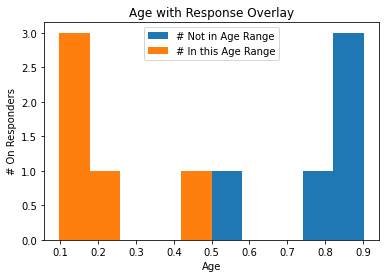

In [462]:
#Feature 1 - Age in the Crosstabs
bank_pd=bank_p.to_pandas()
crosstab_01 = pd.crosstab(bank_pd['Age_CAT'], bank_pd['y'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
print(crosstab_norm)
crosstab_norm.plot(kind='hist', stacked = False)

plt.legend(['# Not in Age Range', '# In this Age Range'])
plt.title('Age with Response Overlay')
plt.xlabel('Age'); plt.ylabel('# On Responders'); plt.show()

This is where you are going to do some EDA work. You need to plot your data with graphics.  I want to see 4 plots of the data against the response variable.  After each plot you need to summarize why the plot demonstrates or does not demonstrate that the feature could be useful in the model. 

You also need to create 2 contingency tables against the response. Again, you need to summarize why the contingency tables could be useful in the model.


y                    no       yes
Age_CAT                          
 1)  18 to 24  0.744129  0.255871
 2)  25 to 30  0.849220  0.150780
 3)  31 to 50  0.902123  0.097877
 4)  51 to 65  0.884889  0.115111
 5)  >= 65     0.579012  0.420988


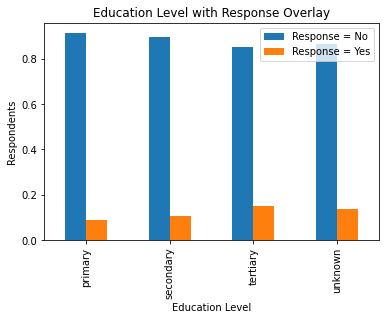

In [463]:
#C. Build additional features
#Feature 2 - Education in the Crosstabs
bank_pd=bank_p.to_pandas()
crosstab_02 = pd.crosstab(bank_pd['education'], bank_pd['y'])
print(crosstab_norm)
crosstab_norm = crosstab_02.div(crosstab_02.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = False)

plt.legend(['Response = No', 'Response = Yes'])
plt.title('Education Level with Response Overlay')
plt.xlabel('Education Level'); plt.ylabel('Respondents'); plt.show()

#**V. R Data Analysis**

In [464]:
%%R
#Plot 1

NULL


In [465]:
%%R
#Plot 2

NULL


In [466]:
%%R
#Plot 3

NULL


In [467]:
%%R
#Plot 4

NULL


In [468]:
%%R
#Contingency Table 1

NULL


In [469]:
%%R
#Contingency Table 2

NULL


Now that the EDA is done for this round, I want you to prepare a decision tree model. 

1. Explain why you need to split your data into training and test sets?

##### In classification modeling it is important to train the model with data that will be used in the model. By running a training set of data through the model the analyst can check the accuracy of the model, how valid this model is predicting

##### By splitting the data, the analyst sets aside random data for training the model and the final test or model outcome.

##### Testing the data in the with the algorithm avoids bias, overfitting and help make sure the model is using random and balanced data.  The goal of training is to see how the algorithm works with a data. So, splitting the data must allow test data to be accurate and like the data in the training set.  Then when training occurs, it will be able to predict the same in the test set.

#### >>>
2. What percentage split are you going to use?  
##### According the Larose textbook, the data splits differ depending the size and complexity of the dataset. 
##### Range is approximately 75% to 90%  for the test data, while the training is 25% to 10%.  Yet, others sources for small or less complex recommend that the training sets have approximately 50% to 60%

#### >>>
3. How does that percentage affect your model?  

#####  The percentage that is used in model should provide proper source of data to predict correct outcomes for the analyst to present to the stakeholders and decision-makers.  
#####  Data dredging and other tactics that seek to level significances to meet parameters not in the data must be avoided. 


#### >>>
4. If you select a higher or lower percentage for your training / test split what affect will it have on your validation of the model.

#####  A too high percentage of training data can provide the test data inaccurate results or predictions.  Not enough training data will  result less than accurate algorithms in the model that can be generalize to the test set use in the model

#### >>>
5. Why do you need to validate your model?
##### When the analysis uses the models algorithms he or she will be able to output a baseline performance of the models, compare the outcomes and make predictions correctly.  

##### Accuracy is great, but it is not everything to an analysts making important prediction reports that others will use to make decisions.  So, the analyst must make sure the model is valid and reliable. 

##### Validation of the model provide more accurate predictictions and avoids the pitfalls of overfitting.  Also,  the process of cross‐validation, with 2-fold and k-fold cross-validation using random assignment in the train and test datasets support model validation process. 

#### >>>
####  


In [470]:
%%R
pct<-X #Change X to the percentage split you want to use
  
set.seed(1)
samp<-sample(nrow(bank), size=pct*nrow(bank))
bank_trn<-bank[samp]
bank_tst<-bank[-samp]

R[write to console]: Error in withVisible({ : object 'X' not found




Error in withVisible({ : object 'X' not found


RInterpreterError: ignored

In [ ]:
%%R
#B. Decision Trees
  
#1. Model and Display the Tree
rpart1<-rpart(y~., bank_trn[, .(y, #Put your predictors here separated by a comma
                                  
                                  )], method="class")



In [ ]:
%%R
#Display you tree 

In [ ]:
%%R
#Predict 
pred1<-predict(rpart1, bank_tst, type="class")
tbl_dec1<-table(bank_tst$y, pred1)
tbl_dec1


In [ ]:
%%R
accuracy_Test1 <- sum(diag(tbl_dec1)) / sum(tbl_dec1)
accuracy_Test1  

Adjust some tuning paramters. 

**Default**
rpart.control(minsplit = 20, minbucket = round(minsplit/3), cp = 0.01, 
              maxcompete = 4, maxsurrogate = 5, usesurrogate = 2, xval = 10,
              surrogatestyle = 0, maxdepth = 30, ...)

Using R, we can adjust the following: 

**Arguments**

minsplit - the minimum number of observations that must exist in a node in order for a split to be attempted.

minbucket	- the minimum number of observations in any terminal <leaf> node. If only one of minbucket or minsplit is specified, the code either sets minsplit to minbucket*3 or minbucket to minsplit/3, as appropriate.

maxdepth	
Set the maximum depth of any node of the final tree, with the root node counted as depth 0. Values greater than 30 rpart will give nonsense results on 32-bit machines.

cp	- complexity parameter. Any split that does not decrease the overall lack of fit by a factor of cp is not attempted. The main role of this parameter is to save computing time by pruning off splits that are obviously not worthwhile. Essentially,the user informs the program that any split which does not improve the fit by cp will likely be pruned off by cross-validation, and that hence the program need not pursue it.

In [ ]:
%%R
#Adjust tuning parameters
cont <- rpart.control(
    minsplit = #X,
      minbucket = #X,
      maxdepth = #X,
      cp = #X)	
      
rpart2<-rpart(y~., bank_trn[, .(y, #Put your predictors here separated by a comma. Use the same ones as above
                                , method="class"
      , control=cont)


In [ ]:
#Display your tree

1. Describe what your tree looks like after you adjusted tuning parameters?

2. Generally, why are tuning parameters important in models?

In [ ]:
%%R
#4. Variable importance
var.imp<-as.data.frame(rpart2$variable.importance)
var.imp$variable<-row.names(var.imp)
var.imp<-as.data.table(var.imp)
var.imp[, variable:=factor(variable, levels=c(var.imp[, .(variable)][order(rpart2$variable.importance)] %>% pull()))]

var.imp_plt2<-ggplot(var.imp, aes(x=as.factor(variable), y=rpart2$variable.importance))+geom_bar(stat="identity")+theme_classic()+coord_flip()
var.imp_plt2

1. Where any of the features you developed important? Please describe.

In [ ]:
%%R
#5. Predict 
pred2<-predict(rpart2, bank_tst, type="class")
tbl_dec2<-table(bank_tst$y, pred2)
tbl_dec2

In [ ]:
%%R
accuracy_Test2 <- sum(diag(tbl_dec2)) / sum(tbl_dec2)
accuracy_Test2

In [ ]:
%%R
#6. ROCR Curve
pred_rocr2<-predict(rpart2, newdata=bank_tst, type="prob")[,2]
pred_rocr2<-prediction(pred_rocr2, labels=as.data.frame(bank_tst$y))
perf2 <- performance(pred_rocr2, "tpr", "fpr")
perf2<-data.table(fpr=perf2@x.values[[1]], tpr=perf2@y.values[[1]])

auc<-performance(pred_rocr2, "auc")
auc<-round(auc@y.values[[1]],2)
auc

1. Please describe AUC.  

2. What is it used to measure?

3. How did your model do? 

4. Do you think your model has a reliable prediction? Why or Why Not?

In [ ]:
%%R
rocr2_plt2<-ggplot(perf2, aes(x=fpr, y=tpr))+geom_line()+theme_classic()
rocr2_plt2<-rocr2_plt2+geom_abline(intercept=0, color="red")
rocr2_plt2

#V. Python Data Analysis

### H2O Setup



In [ ]:
import h2o

h2o.init()
#h2o.shutdown()

In [472]:
# Dataframe
bank_pd = bank_p.to_pandas()

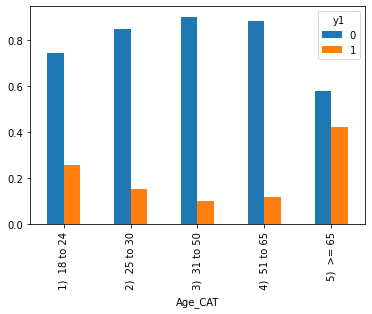

In [473]:
#Plot 1
# numeric_col = ['y1', 'age']

# corr_matrix = bank_pd.loc[:,numeric_col].corr()
# print(corr_matrix)
 
#Using heatmap to visualize the correlation matrix
# sn.heatmap(corr_matrix, annot=True)

crosstab_01 = pd.crosstab(bank_pd['Age_CAT'], bank_pd['y1'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = False)

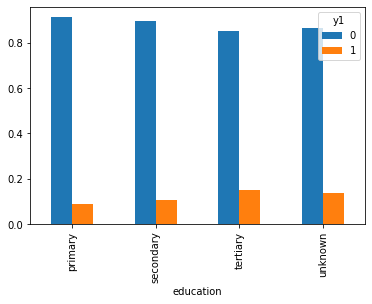

In [474]:
#Plot 2
crosstab_02 = pd.crosstab(bank_pd['education'], bank_pd['y1'])
crosstab_norm = crosstab_02.div(crosstab_02.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = False)

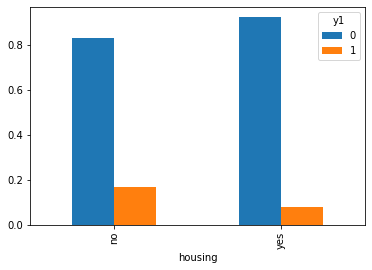

In [475]:
#Plot 3
crosstab_03 = pd.crosstab(bank_pd['housing'], bank_pd['y1'])
crosstab_norm = crosstab_03.div(crosstab_03.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = False)

In [476]:
#Plot 4
crosstab_01 = pd.crosstab(bank_pd['age'], bank_pd['marital'])
crosstab_01['Total'] = crosstab_01.sum(axis=1)  #JJG - Changed t1 to crosstab_01
crosstab_01.loc['Total'] = crosstab_01.sum()    #JJG - Changed t1 to crosstab_01
crosstab_01

marital,divorced,married,single,Total
age,,,,
18,0,0,12,12
19,0,0,35,35
20,0,3,47,50
21,0,5,74,79
22,0,9,120,129
...,...,...,...,...
92,0,2,0,2
93,0,2,0,2
94,1,0,0,1


In [477]:
#Contingency Table 1
crosstab_01 = pd.crosstab(bank_pd['age'], bank_pd['marital'])
crosstab_01['Total'] = crosstab_01.sum(axis=1)  #JJG - Changed t1 to crosstab_01
crosstab_01.loc['Total'] = crosstab_01.sum()    #JJG - Changed t1 to crosstab_01
crosstab_01

marital,divorced,married,single,Total
age,,,,
18,0,0,12,12
19,0,0,35,35
20,0,3,47,50
21,0,5,74,79
22,0,9,120,129
...,...,...,...,...
92,0,2,0,2
93,0,2,0,2
94,1,0,0,1


In [478]:
#Contingency Table 2

In [414]:
crosstab_02 = pd.crosstab(bank_pd['Education'], bank_pd['y1'])

crosstab_02 = pd.crosstab(bank_pd['y1'], bank_pd['Education'])
round(crosstab_02.div(crosstab_02.sum(0), axis = 1)*100, 1)

Education,0,1,2,3
y1,,,,
0,91.4,89.4,85.0,86.4
1,8.6,10.6,15.0,13.6


In [479]:
# Creating a dataframe
bank_pd = bank_p.to_pandas()
  
#Convert variables to factor variables for modeling
bank_pd['job'],_=pd.factorize(bank_pd['job'], sort=True)
bank_pd['marital'],_=pd.factorize(bank_pd['marital'], sort=True)
bank_pd['education'],_=pd.factorize(bank_pd['education'], sort=True)
bank_pd['default'],_=pd.factorize(bank_pd['default'], sort=True)
bank_pd['housing'],_=pd.factorize(bank_pd['housing'], sort=True)
bank_pd['loan'],_=pd.factorize(bank_pd['loan'], sort=True)
bank_pd['poutcome'],_=pd.factorize(bank_pd['poutcome'], sort=True)
bank_pd['contact'],_=pd.factorize(bank_pd['contact'], sort=True)
bank_pd['month'],_=pd.factorize(bank_pd['month'], sort=True)
bank_pd['Age_CAT'],_=pd.factorize(bank_pd['age'], sort=True)
bank_pd['Education'],_=pd.factorize(bank_pd['education'], sort=True)

# Creating a dataframe with X%
# values of original dataframe
bank_pd_train = bank_pd.sample(frac = 0.8)  #Put the percentage split here
  
# Creating dataframe with 
# rest of the X% values
bank_pd_tst = bank_pd.drop(bank_pd_train.index)

bank_pd_tst.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,count,y1,previous_norm,campaign_norm,Age_CAT,Education
count,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.00000,9042.000000,9042.000000,9042.0,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000
mean,40.949016,4.404667,1.168104,1.232581,0.017363,1348.965052,0.559500,0.162796,0.645654,15.977660,5.525216,2.784340,40.46837,0.550431,2.560274,1.0,0.118226,-0.012994,0.006709,22.949016,1.232581
std,10.536223,3.290196,0.604931,0.742464,0.130629,3118.705150,0.496475,0.369200,0.902054,8.310381,3.004490,3.167336,101.25152,1.775022,0.988354,0.0,0.322893,0.770580,1.022530,10.536223,0.742464
min,19.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.00000,0.000000,0.000000,1.0,0.000000,-0.251949,-0.569341,1.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,71.000000,0.000000,0.000000,0.000000,9.000000,3.000000,1.000000,-1.00000,0.000000,3.000000,1.0,0.000000,-0.251949,-0.569341,15.000000,1.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,2.000000,-1.00000,0.000000,3.000000,1.0,0.000000,-0.251949,-0.246505,21.000000,1.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1414.750000,1.000000,0.000000,2.000000,22.000000,8.000000,3.000000,-1.00000,0.000000,3.000000,1.0,0.000000,-0.251949,0.076332,30.000000,2.000000
max,90.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,50.000000,854.00000,29.000000,3.000000,1.0,1.000000,12.337659,15.249627,72.000000,3.000000


Now that the EDA is done for this round, I want you to prepare a decision tree model. 

1. Explain why you need to split your data into training and test sets?

### 
> ### #> Splitting a dataset helps to eliminate bias in classification models.  In analysis we want to have an unbias model.  By splitting the data in training set and test set is part of the preparation in modeling. In classification models, an analyst can apply methods and algorithms to test the data within a model. It is an important gauge and measure to how an algorithm is performing. sklearn is used in machine learning and predictive analytics tools in part of the splitting process.


2. What percentage split are you going to use?
### 
### #>  Typical split is round 25 / 75 or 20 / 80  according the textbook and standards. For this I used 20 / 80 split


3. How does that percentage affect your model?
###   
### #>  The analyst must ensure that the training set represents the entire dataset (sampling), so it is important to confirm there is a selection of balanced evenly-distributed data covering all of categories properly and accurately depending on the question the model in set to help answer.


4. If you select a higher or lower percentage for your training / test split what affect will it have on your validation of the model.
###    
### #>  If an analysts selects to low a percentage of data for the training there is a risk of not having enough data to test and validate the model.  If the analyst has too high a percentage of test data the risk may result in not having enough model not being able to perform well to provide accurate outcome for the analysis.


5. Why do you need to validate your model?
###   
### #>  It is very important to validate the model.  The modeling process must be able to provide the analysts and the stakeholders outcomes that they depend on. There are several ways to validate model and its outcomes to provide a more accurate outcome.  It is super important to evaluate the model and its outcomes by establishing a baseline model of accuracy and comparing that to other regression models and classification algorithms.  These methods help visualize and structure the data output for making predictions.  





### This is the Evaluation of the Model

In [485]:
train=bank_pd_train.loc[:,['Age_CAT', 'Education', 'marital']]  #I added my predictors here!
tar=bank_pd_train.loc[:,['y1']]
tst=bank_pd_tst.loc[:,['Age_CAT', 'Education', 'marital']] # I added my predictors here!

In [496]:
clf = tree.DecisionTreeClassifier() # defining decision tree classifier
clf=clf.fit(train,tar)

In [497]:
prediction = clf.predict(tst) #  Run Predictions

In [498]:
from sklearn.metrics import accuracy_score  #  accuracy is good at 88%.  But it doesn't tell how model will perform
from sklearn import metrics

y=bank_pd_tst.loc[:,['y1']]

fpr, tpr, thresholds = metrics.roc_curve(y, prediction)
accuracy_score(y, prediction)

0.8814421588144216

In [500]:
metrics.auc(fpr, tpr)

0.5103422601326248

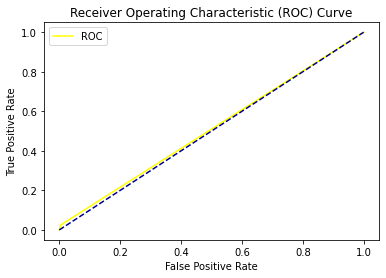

In [509]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='yellow', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

####  Adjust some tuning paramters.  Fill in the Xs with values.  The values next to each one are the defaults

In [518]:
clf = tree.DecisionTreeClassifier(
    max_depth= 25  #Default=None
    , min_samples_leaf = 10 #Default=1
    , min_samples_split = 15 #Default=2
    , min_impurity_decrease = 0.001)  #Default=0
clf=clf.fit(train,tar)
prediction = clf.predict(tst) #  Run Predictions

[Text(558.0, 755.0, 'Age_CAT <= 42.5\ngini = 0.206\nsamples = 36166\nvalue = [31946, 4220]\nclass = 0'),
 Text(372.0, 453.0, 'marital <= 1.5\ngini = 0.194\nsamples = 35233\nvalue = [31398, 3835]\nclass = 0'),
 Text(186.0, 151.0, 'gini = 0.168\nsamples = 25010\nvalue = [22695, 2315]\nclass = 0'),
 Text(558.0, 151.0, 'gini = 0.253\nsamples = 10223\nvalue = [8703, 1520]\nclass = 0'),
 Text(744.0, 453.0, 'gini = 0.485\nsamples = 933\nvalue = [548, 385]\nclass = 0')]

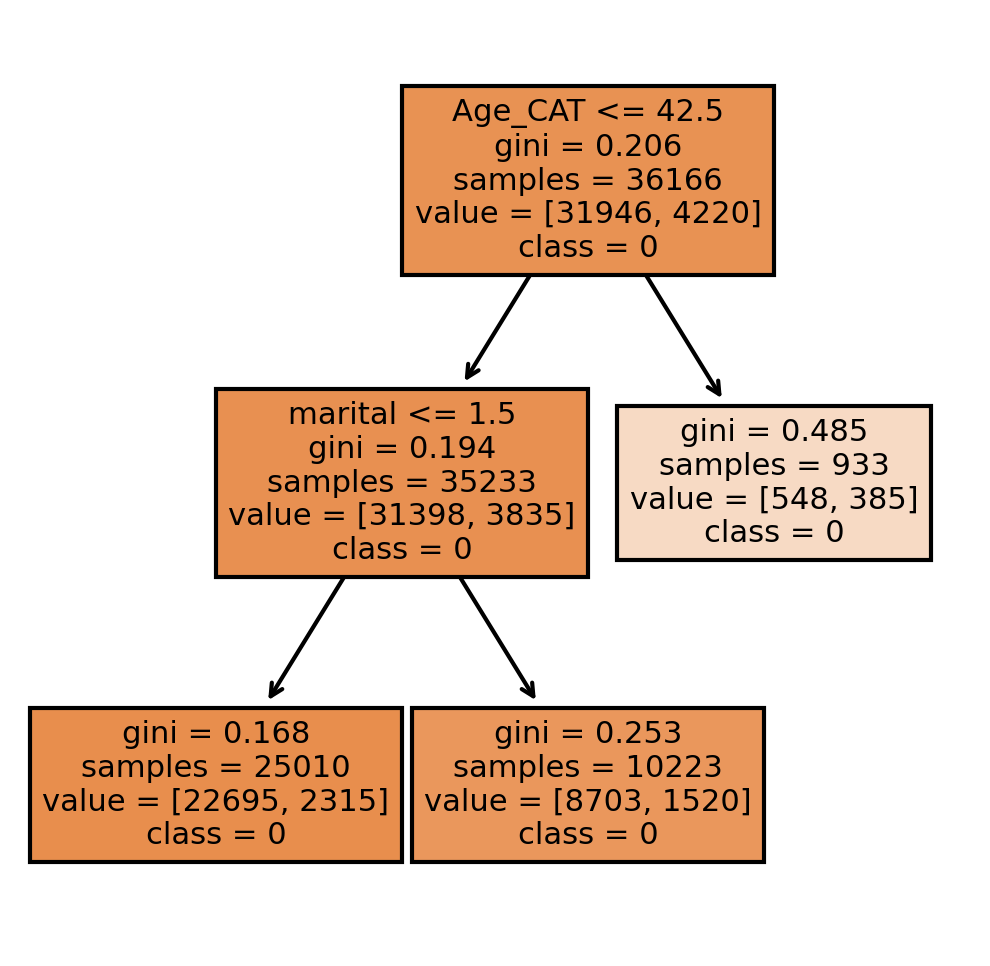

In [519]:
#Display your tree
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz

X_names = ['Age_CAT', 'Education', 'marital', 'housing']
y_names = ['0','1']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,feature_names = X_names, class_names=y_names, filled = True)


1. Describe what your tree looks like after you adjusted tuning parameters?

#### #>  The tree provides insight to the variables. The top, is the root node and the rest descend through the tree based on each decision node within the tree.  The top node, Age category (Age_CAT) tells us less that 42 is mean age in these records.  Additionally, the records in the Age Category show a higher greater number of marital category in the married status, than those who are not married. Of the records in the range of Age 42.5 (mean) and show up as married, the  class = 0 is all categories.  So, it is important to find variables that show up with a class = 1.  Class is report as 0 or 1, a binary number that typicially mean yes or no or true or false.  None of the variables indicated a TRUE or Yes as a valid variable with the other variables provided.

2. Generally, why are tuning parameters important in models?

####  #  > Also, important to note education was add to this analysis. It was not significant enough to be reported.  So, as an analyst it is important to go in the process and loop back to find higher predictor variable.s 




In [ ]:
y=bank_pd_tst.loc[:,['y1']]

fpr, tpr, thresholds = metrics.roc_curve(y, prediction)
accuracy_score(y, prediction)

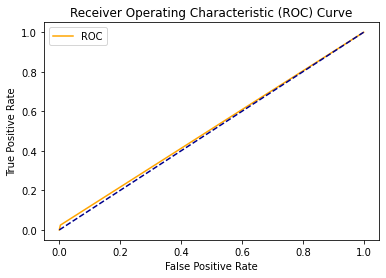

In [517]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [525]:
#D. Evaluate


1. Please describe AUC.  
#### #>  In Machine Learning it is important to understand the performance of the classification modeling you are planning to use.   It is recommended that analysts use the AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve to analyze the model performance with use of various variables before going to test.  These tools provide the important visualization of the model's performance to make appropriate adjustments to the dataset and approached to the analysis. 

It is a key evaluation metrics for validation of a classification model's performance.
#

2. What is it used to measure?
#### #> In Machine Learning it is important to understand the performance of the classification modeling.  So it is recommend that analyst use the AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. 

#### #> It is a key evaluation metrics for validation of a classification model's performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics)

#### #> The AUC ROC provides in this analysis various threshold settings for gauging model performance.  The ROC is a probability curve, while the AUC allows the analyst to visual the degree or measure of separability. 

#### #> These tools will demonstrate what the model is capable of distinguishing between classes of the variables. 

#### #> Note:  The higher the amount in the AUC, the better performance of the model can be expected, especiall with predicting binary amounts.

#### #> An example from the website, Towards Data indicates that higher AUC ROC score of the records of patients with the disease and no disease.
While the ROC curve plotting of the True Positive Rate(TPR) against the False Positive Rate FPR is where the TPR is on the y-axis and FPR is on the x-axis.

#### #>  https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
#

3. How did your model do? 
  #### #>  My model did not present a solid performance.  The initial analysis of the variables showed 88% accuracy, while the AUC was only 51%.  That's not a reliable model.    Yet, with more iterations of the variables, this analysts believes a prediction can be made to support this bank's marketing campaigns. 

4. Do you think your model has a reliable prediction? Why or Why Not?
#### #>  At this writing, the model for analyzing this data for the bank's marketing campaign is not yet ready for release.  Yet, with more time and education this analyst will be able to use the tools for modeling in Machine Learning to provide a better performing model.



In [522]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif

feat_importance = clf.tree_.compute_feature_importances(normalize=True)
feat_importance  #Outputs in order of the predictors you listed

array([0.78588389, 0.        , 0.21411611])

1. Where any of the features you developed important? Please describe.


#### >#  This is important to understand the process, the details and how to management expectations.  The variables initially chosen for the assignment did not perform well, in the gini and AUC / ROC tests of the variables.  Like any scientist knows, the elimination of the variables is important to creating a reliable model. These variables together are not showing high predictability at 51%, but there are more tests to apply.  The loop part of the process is surely accurate to this models performance and reliability. 

###  #>
